ChEn-5310: Computational Continuum Transport Phenomena Fall 2021 UMass Lowell; Prof. V. F. de Almeida **29Sep21**

# 05f. Galerkin Method w/ Finite Element Lagrange Basis Functions
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
  \newcommand{\Ecal}{\mathcal{E}}
$

---

## Table of Contents<a id="toc"></a>
* [Objectives](#obj)
1. [Peclet Problem with Dirichlet Boundary Conditions](#problem)
1. [Galerkin Method with Dirichlet Boundary Conditions](#galerkin)
   + [Data](#data)
   + [Lift function](#lift-function)
   + [Finite Element Lagrange Basis Functions](#fem-lagrange-basis)
      - [Assemble $\Amtrx$ in Logical Domain](#assemble-A-logical)
      - [Assemble $\bvec$ in Logical Domain](#assemble-b-logical)
      - [FEM Solution](#results-lagrange)
   + [Results](#results)
   + [Results: Mesh Convergence](#results-mesh-convergence)
   + [Results: Comparison to Cubic Hermite Basis Functions](#results-cubic-hermite)
---

## [Objectives](#toc)<a id="obj"></a>

 + Describe the Galerkin method for solving linear differential equations with unsymmetric operators ([OneNote notes: Engy-5310-galerkin-method](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/EjQ2XFGMgN5CtPiiB_3I4twBEQd_uh606WDA7euZdJe9bA?e=Hq5lD6).
 + Use the function approximation theory described in the course (see previous notebooks and notes).
 + Apply the finite element Lagrange basis functions.

## [Peclet Problem with Dirichlet Boundary Conditions](#toc)<a id="problem"></a>

The following sections describe what is referred to in the literature as the one-dimensional Peclet problem with Dirichlet boundary conditions. This is a classical boundary-value problem of mathematics.

Solve the Peclet model problem. Find $u:[a,b]\subset\Reals\rightarrow\Reals$ such that:

\begin{align*}
 c(x)\,u'(x) &= -\bigl(-D(x)\, u'\bigr)'(x) + s(x)\,u(x) + f(x) \quad\quad \forall \quad\quad x\in [a,b], \\
 u(a) &= u_a, \\
 u(b) &= u_b.
\end{align*}
   
This problem is linear and has an analytical solution for given data: convective speed, $c(x)$, diffusion coefficient, $D(x)$, source, $s(x)$ slope, source bias, $f(x)$. The *diffusion flux* associated to the quantity $u$, is denoted $q := -D(x)\,u'$, and it is often of interest as a derived quantity.

The values of the dependent variable are given on the two end points of the domain. This is called *essential* boundary conditions or  *Dirichlet boundary conditions*. If the values are equal to zero, the boundary condition is referred to as homogeneous.

## [Galerkin Method w/ Finite Element Basis Functions](#toc)<a id="galerkin"></a>

The Galerkin weak formulation is as follows. Find $u \in H^1\!\bigl([a,b]\bigr)$ so that 

\begin{align*}
 \int\limits_a^b c\, u'(x)\, v(x)\,dx - \int\limits_a^b -D\, u'(x)\,v'(x)\,dx - \int\limits_a^b S\,v(x)\,dx &= 0 \quad\quad \forall \quad\quad v \in H^1_0\!\bigl([a,b]\bigr), 
\end{align*}
or
\begin{align*}
\bigl(c\, u', v\bigr) - \bigl(-D\, u',v'\bigr) - \bigl(S,v\bigr) &= 0 \quad\quad \forall \quad\quad v \in H^1_0\!\bigl([a,b]\bigr), 
\end{align*}

where $H^1\!\bigl([a,b]\bigr) := \bigl\{ u:[a,b]\subset\Reals\rightarrow \Reals \mid \bigl(u',u'\bigr) + \bigl(u,u\bigr) < \infty\bigr\}$ and $H^1_0\!\bigl([a,b]\bigr) := \bigl\{ w \mid w \in H^1(a,b), w(a) = 0, w(b) =0 \bigr\}$. Both function sets as just defined are Hilbert spaces. The function $w$ is called a test function. Because $w$ and $u$ are sought in very similar sets of functions, this variational form is called Galerkin's variational form.


The coefficients $\cvec^* := \{c_i\mid i=1,\ldots,N\}$ solve

\begin{equation*}
 \overset{(N\times N)}{\Amtrx}\,\overset{(N\times 1)}{\cvec^*} = \overset{(N\times 1)}\bvec ,
\end{equation*}

where:
  + $A_{i,j} = (c\,\phi'_j,\phi_i) - (-D\,\phi'_j,\phi'_i) - (s\,\phi_j,\phi_i)$
  + $b_i =  - \bigl( (c\,w',\phi_i) - (-D\,w',\phi'_i) - (s\,w,\phi_i) - (f,\phi_i) \bigr)$
  
This formulation uses basis functions that satisfy homogeneous boundary conditions, however the linear algebraic problem for the optimum coefficients accounts for the inhomogeneous boundary condition data through the lift function $w$. Therefore the solution is

\begin{equation*}
 u^*_N = u_0 + w.
\end{equation*}

### [Data](#toc)<a id="data"></a>

Solve problem with parameter values:

> + a = 0 cm
> + b = 25 cm
> + $u_a$ = 1 g/cc
> + $u_b$ = 3 g/cc
> + D = same value above cm^2/s
> + S = same value above $s^{-1}$
> + f = same value above g/cc-s

In [1]:
'''Domain'''

x_a = 0
x_b = 25

In [2]:
'''Parameters and data'''

conv_speed = 0.1
diff_coeff_value = 0.1
source_bias_value = 1e-2
source_slope_value = -1e-2

u_a = 2
u_b = -3

# shape pts =  3


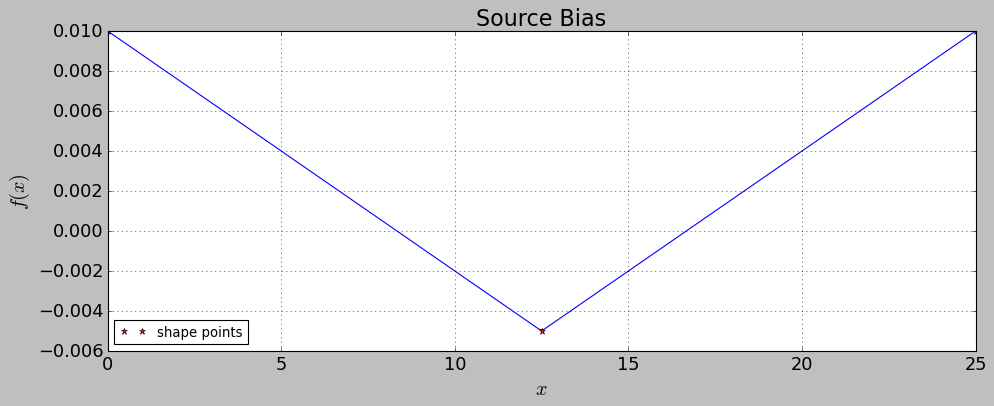

In [3]:
'''Generate the source bias'''

try:    
    from engy_5310.toolkit import TargetFunction   
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'

shape_pts = [(x_a,source_bias_value), (x_b,source_bias_value)]
shape_pts = [(x_a,source_bias_value), ((x_b+x_a)/2,-2*source_bias_value/4), (x_b,source_bias_value)]
#shape_pts = [(x_a,source_bias_value), ((x_b+x_a)/8,-2*source_bias_value), ((x_b+x_a)/4,source_bias_value), (3*(x_b+x_a)/4,2*source_bias_value), (x_b,source_bias_value)]

print('# shape pts = ', len(shape_pts))

source_bias = TargetFunction(shape_pts, type='stepwise')
source_bias = TargetFunction(shape_pts, type='linear')
#source_bias = TargetFunction(shape_pts, type='legendre')
  
source_bias.plot(n_plot_pts=200, show_shape_pts=True, title='Source Bias')

# shape pts =  5


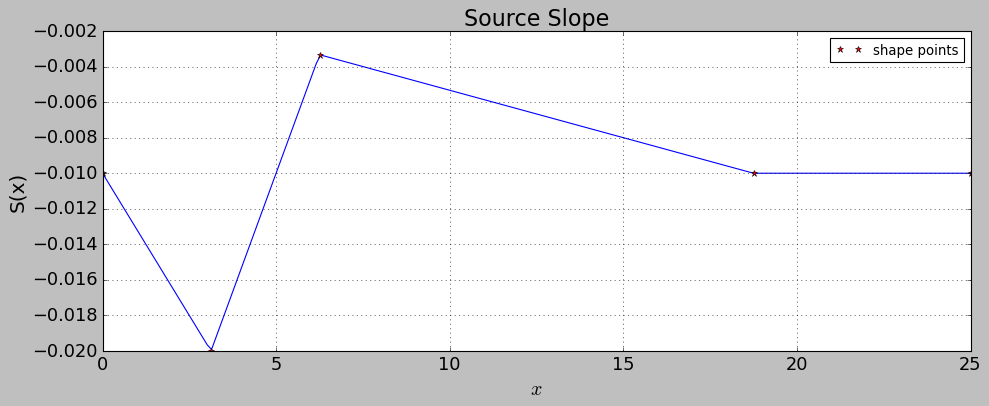

In [4]:
'''Generate the source slope'''

try:    
    from engy_5310.toolkit import TargetFunction   
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'

shape_pts = [(x_a,source_slope_value), (x_b,source_slope_value)]
#shape_pts = [(x_a,source_slope_value), ((x_b+x_a)/2,1.2*source_slope_value), (x_b,source_slope_value)]
shape_pts = [(x_a,source_slope_value), ((x_b+x_a)/8,2*source_slope_value), ((x_b+x_a)/4,source_slope_value/3), (3*(x_b+x_a)/4,source_slope_value), (x_b,source_slope_value)]

print('# shape pts = ', len(shape_pts))

source_slope = TargetFunction(shape_pts, type='legendre')
source_slope = TargetFunction(shape_pts, type='linear')
  
source_slope.plot(n_plot_pts=200, show_shape_pts=True, y_label='S(x)', title='Source Slope')

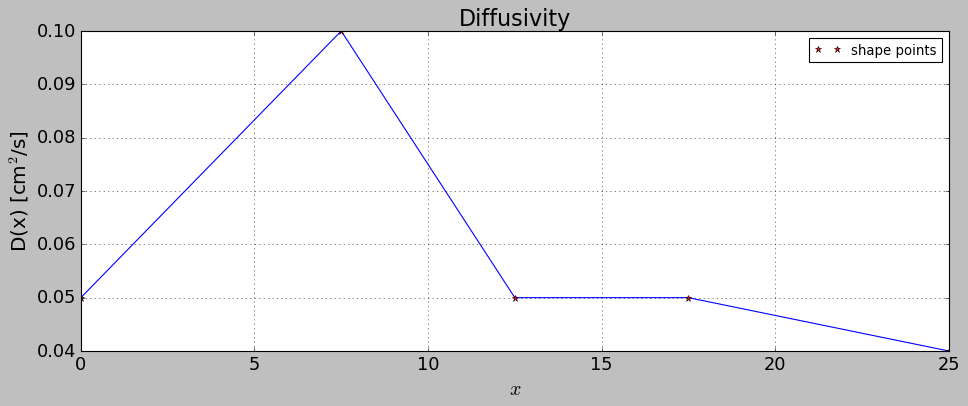

In [5]:
'''Diffusion coefficient'''

from engy_5310.toolkit import TargetFunction   

shape_pts = [(x_a, 0.5*diff_coeff_value), ((x_a+x_b)/2*0.6, diff_coeff_value), ((x_a+x_b)/2, 0.5*diff_coeff_value), ((x_a+x_b)/2*1.4, 0.5*diff_coeff_value), (x_b, 0.4*diff_coeff_value)]

diff_coeff = TargetFunction(shape_pts, type='linear')
#diff_coeff = TargetFunction(shape_pts, type='legendre')
  
diff_coeff.plot(n_plot_pts=500, show_shape_pts=True, title='Diffusivity', y_label=r'D(x) [cm$^2$/s]')

### [Lift Function](#toc)<a id="lift-function"></a>
Since $w\in V(a,b)$, construct as follows $w = \sum\limits_{i=1}^N\,\alpha_i\,\psi_i$ such that $w(a) = u_a$ and $w(b) = u_b$.

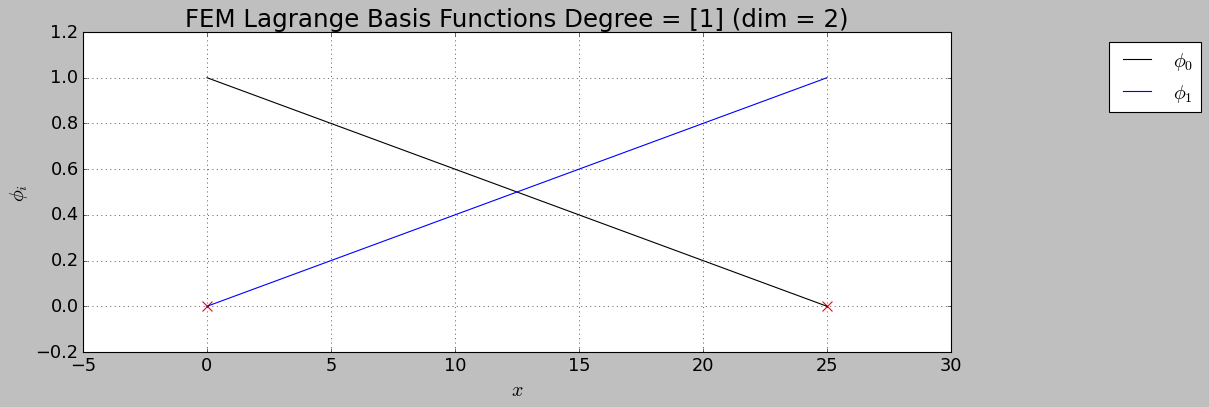

In [6]:
'''Build the lift basis functions'''

degree = 1
n_elem = 1

try:    
    from engy_5310.toolkit import LagrangeFEMBasis  
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
lift_basis = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[x_a, x_b])
lift_basis.plot(n_plot_pts=300)

In [7]:
'''Build the coefficients of the lift function'''

import numpy as np

alpha_vec = np.zeros(len(lift_basis.basis_func_list))
alpha_vec[0] = u_a
if degree == 2:
   alpha_vec[-2] = u_b
elif degree == 1:
   alpha_vec[-1] = u_b
elif degree == 3:
   alpha_vec[-3] = u_b

In [8]:
'''Build the lift function'''

def w_lift(x):
    a_mtrx = lift_basis.evaluation_matrix(x)
    return a_mtrx@alpha_vec

In [9]:
'''Build the lift function derivative'''

def w_lift_prime(x):
    a_mtrx = lift_basis.evaluation_matrix(x, derivative=True)
    return a_mtrx@alpha_vec

In [10]:
'''Test boundary values'''

print('w(a) = ',w_lift(x_a), ' w(b) = ', w_lift(x_b))

w(a) =  [2.]  w(b) =  [-3.]


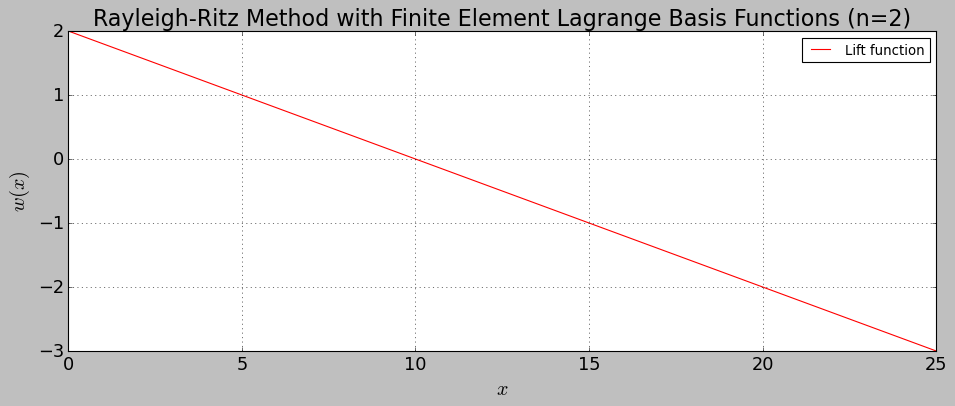

In [11]:
'''Rayleigh Ritz Method with Lagrange Basis Functions'''

n_pts = 500
x = np.linspace(x_a, x_b, n_pts)
u_values = w_lift(x)

import matplotlib.pyplot as plt
#%matplotlib inline
#plt.style.use('dark_background')
plt.figure(1, figsize=(14, 5))

plt.plot(x, u_values, 'r-', label='Lift function')

plt.title(r'Rayleigh-Ritz Method with Finite Element Lagrange Basis Functions (n='+str(len(lift_basis.basis_func_list))+')', fontsize=20)
plt.ylabel(r'$w(x)$', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best',fontsize=12)
plt.grid(True)
plt.show()

### [Finite Element Lagrange Basis Functions](#toc)<a id="fem-lagrange-basis"></a>

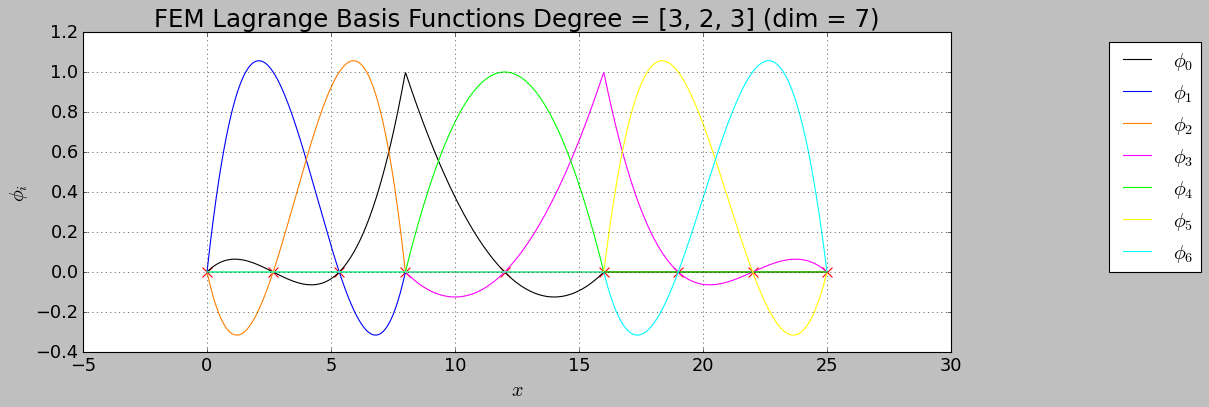

In [12]:
'''Build the basis functions'''

try:    
    from engy_5310.toolkit import LagrangeFEMBasis  
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'

degree = [3,2,3]
n_elem = [1,1,1]

femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[x_a, 8, 16, x_b], bc_x_min='dirichlet', bc_x_max='dirichlet')
femlb.plot(n_plot_pts=800)

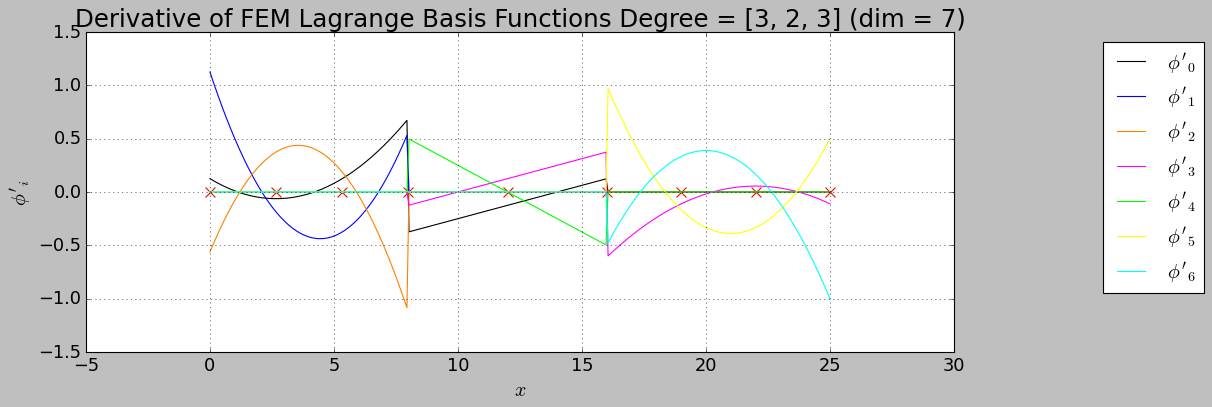

In [13]:
femlb.plot(n_plot_pts=300, derivative=True)

In [14]:
'''Mesh artifact'''

for (p_id, elem_gnode_ids) in enumerate(femlb.local_to_global_node_id_map):
    print('Partition %i'%p_id, ' Degree %i'%(femlb.degree_partition[p_id]))
    for (e_id, gnode_ids) in enumerate(elem_gnode_ids):
        printout = '\t element #%i:'%e_id
        for (lnode_id, gnode_id) in enumerate(gnode_ids):
            printout += ' x_%i = %+5.2e'%(gnode_id, femlb.patches[p_id][e_id][lnode_id])
        print(printout)

Partition 0  Degree 3
	 element #0: x_-1 = +0.00e+00 x_3 = +8.00e+00 x_1 = +2.67e+00 x_2 = +5.33e+00
Partition 1  Degree 2
	 element #0: x_3 = +8.00e+00 x_5 = +1.60e+01 x_4 = +1.20e+01
Partition 2  Degree 3
	 element #0: x_5 = +1.60e+01 x_-1 = +2.50e+01 x_6 = +1.90e+01 x_7 = +2.20e+01


#### [Assembly of $\Amtrx$ in Logical Domain](#toc)<a id="assemble-A-logical"></a>
Element-by-element assembly of $\Amtrx$
  + $A_{i,j} = (c\,\phi'_j,\phi_i) + (D\,\phi'_j,\phi'_i) - (s\,\phi_j,\phi_i)$

In [15]:
'''Assemble A matrix element-by-element'''
from scipy.integrate import quad

def assemble_a_matrix(fembf):
    
    n_dof = fembf.n_dof # total number of degrees of freedom
    a_mtrx = np.zeros((n_dof,n_dof), dtype=np.float64)

    for (p_id, degree) in enumerate(fembf.degree_partition):  
        # number of local nodes
        n = len(fembf.parent_basis_func_list[degree])

        local_a_conv_mtrx = np.zeros((n, n), dtype=np.float64)
        local_a_diff_mtrx = np.zeros((n, n), dtype=np.float64)
        local_a_source_mtrx = np.zeros((n, n), dtype=np.float64)

        for (e, dof_ids) in enumerate(fembf.dof_ids[p_id]):
            patch_nodes_x = fembf.patches[p_id][e]
            h_e = patch_nodes_x[1] - patch_nodes_x[0]
            x_e_bar = (patch_nodes_x[0] + patch_nodes_x[1])/2.0
            parent_mapping_jacobian = fembf.parent_mapping_prime(h_e)

            diff_coeff_parent = lambda zeta, x_e_bar=x_e_bar, h_e=h_e: \
                                 diff_coeff(fembf.parent_mapping(zeta, x_e_bar, h_e))

            source_slope_parent = lambda zeta, x_e_bar=x_e_bar, h_e=h_e: \
                                  source_slope(fembf.parent_mapping(zeta, x_e_bar, h_e))

            for I in range(n):
                parent_basis_func_prime_I = fembf.parent_basis_func_prime_list[degree][I]
                parent_basis_func_I = fembf.parent_basis_func_list[degree][I]
                for J in range(n):
                    integrand = lambda zeta: conv_speed * fembf.parent_basis_func_prime_list[degree][J](zeta) * \
                                             parent_basis_func_I(zeta)
                    (local_a_conv_mtrx[I,J], _) = quad(integrand, -1, 1)
                
                    integrand = lambda zeta: diff_coeff_parent(zeta) * fembf.parent_basis_func_prime_list[degree][J](zeta) * \
                                             parent_basis_func_prime_I(zeta)
                    (local_a_diff_mtrx[I,J], _) = quad(integrand, -1, 1)
                
                    integrand = lambda zeta: - source_slope_parent(zeta) * fembf.parent_basis_func_list[degree][J](zeta) * \
                                             parent_basis_func_I(zeta)
                    (local_a_source_mtrx[I,J], _) = quad(integrand, -1, 1)

            for (I, i) in enumerate(dof_ids):
                if i < 0: continue
                for (J, j) in enumerate(dof_ids):
                    if j < 0: continue
                    a_mtrx[i,j] += local_a_conv_mtrx[I,J] + \
                                   local_a_diff_mtrx[I,J] / parent_mapping_jacobian + \
                                   local_a_source_mtrx[I,J] * parent_mapping_jacobian

    return a_mtrx

In [16]:
a_mtrx = assemble_a_matrix(femlb)

A is full rank.
matrix shape = (7, 7)


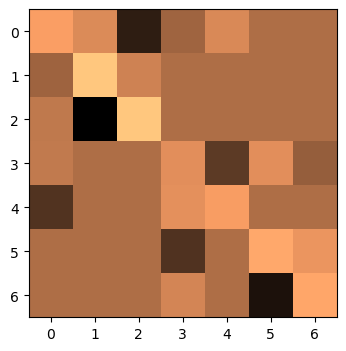

[[ 0.07  0.04 -0.13 -0.01  0.04  0.    0.  ]
 [-0.02  0.14  0.03  0.    0.    0.    0.  ]
 [ 0.02 -0.17  0.14  0.    0.    0.    0.  ]
 [ 0.02  0.    0.    0.05 -0.08  0.05 -0.02]
 [-0.09  0.    0.    0.05  0.07  0.    0.  ]
 [ 0.    0.    0.   -0.09  0.    0.09  0.06]
 [ 0.    0.    0.    0.04  0.   -0.14  0.09]]


In [17]:
try:    
    from engy_5310.toolkit import matrix_rank
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
if matrix_rank(a_mtrx) == min(a_mtrx.shape):
    print('A is full rank.')
else:
    print('A is rank deficient.')

try:    
    from engy_5310.toolkit import plot_matrix   
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
plot_matrix(a_mtrx, color_map=plt.get_cmap('copper'))
np.set_printoptions(precision=2, threshold=50, edgeitems=7, linewidth=150)
print(a_mtrx)

#### [Assembly of $\bvec$ in Logical Domain](#toc)<a id="assemble-b-logical"></a>
Element-by-element assembly of $\bvec$
  + $b_i = (f,\phi_i) - (c\,w',\phi_i) - (D\,w',\phi'_i) + (s\,w,\phi_i)$

In [18]:
'''Assemble b vector element-by-element'''
from scipy.integrate import quad

def assemble_b_vector(fembf):
    
    n_dof = fembf.n_dof # total number of degrees of freedom
    b_vec = np.zeros(n_dof, dtype=np.float64)

    for (p_id, degree) in enumerate(fembf.degree_partition):  
        # number of local nodes
        n = len(fembf.parent_basis_func_list[degree])
    
        local_b_bias_vec = np.zeros(n, dtype=np.float64)
        local_b_conv_vec = np.zeros(n, dtype=np.float64)
        local_b_diff_vec = np.zeros(n, dtype=np.float64)
        local_b_source_vec = np.zeros(n, dtype=np.float64)

        for (e, dof_ids) in enumerate(fembf.dof_ids[p_id]):
            patch_nodes_x = fembf.patches[p_id][e]
            h_e = patch_nodes_x[1] - patch_nodes_x[0]
            x_e_bar = (patch_nodes_x[0] + patch_nodes_x[1])/2.0
            parent_mapping_jacobian = fembf.parent_mapping_prime(h_e)

            source_bias_parent = lambda zeta, x_e_bar=x_e_bar, h_e=h_e: \
                                        source_bias(fembf.parent_mapping(zeta, x_e_bar, h_e))

            w_lift_prime_parent = lambda zeta, x_e_bar=x_e_bar, h_e=h_e: \
                                         w_lift_prime(fembf.parent_mapping(zeta, x_e_bar, h_e)) * h_e/2

            w_lift_parent = lambda zeta, x_e_bar=x_e_bar, h_e=h_e: \
                                   w_lift(fembf.parent_mapping(zeta, x_e_bar, h_e))

            diff_coeff_parent = lambda zeta, x_e_bar=x_e_bar, h_e=h_e: \
                                       diff_coeff(fembf.parent_mapping(zeta, x_e_bar, h_e))

            source_slope_parent = lambda zeta, x_e_bar=x_e_bar, h_e=h_e: \
                                         source_slope(fembf.parent_mapping(zeta, x_e_bar, h_e))

            for I in range(n):
                parent_basis_func_I = fembf.parent_basis_func_list[degree][I]
                parent_basis_func_prime_I = fembf.parent_basis_func_prime_list[degree][I]

                integrand = lambda zeta: source_bias_parent(zeta) * parent_basis_func_I(zeta)   
                (local_b_bias_vec[I], _) = quad(integrand, -1, 1)
                
                integrand = lambda zeta: - conv_speed * w_lift_prime_parent(zeta) * parent_basis_func_I(zeta)
                (local_b_conv_vec[I], _) = quad(integrand, -1, 1)
        
                integrand = lambda zeta: - diff_coeff_parent(zeta) * w_lift_prime_parent(zeta) * parent_basis_func_prime_I(zeta)
                (local_b_diff_vec[I], _) = quad(integrand, -1, 1)
                
                integrand = lambda zeta: source_slope_parent(zeta) * w_lift_parent(zeta) * parent_basis_func_I(zeta)
                (local_b_source_vec[I], _) = quad(integrand, -1, 1)       
            
            for (I, i) in enumerate(dof_ids):
                if i < 0: continue
                b_vec[i] += local_b_bias_vec[I] * parent_mapping_jacobian + \
                            local_b_conv_vec[I] + \
                            local_b_diff_vec[I] / parent_mapping_jacobian + \
                            local_b_source_vec[I] * parent_mapping_jacobian
    return b_vec

In [19]:
b_vec = assemble_b_vector(femlb)

#### [FEM Solution](#toc)<a id="results-lagrange-inhomo"></a>
 + Solve $\overset{(N\times N)}{\Amtrx}\,\overset{(N\times 1)}{\cvec^*} = \overset{(N\times 1)}\bvec$

In [20]:
'''Compute optimal coefficient vector'''

c_star_vec = np.linalg.solve(a_mtrx, b_vec)

In [21]:
'''Build the best approximation function in V_N'''

def u_star(x, femlb, c_star_vec):
    u_0 = femlb.evaluation_matrix(x)@c_star_vec
    w = lift_basis.evaluation_matrix(x)@alpha_vec
    return u_0 + w

In [22]:
'''Build the derivative '''

def u_prime_star(x, femlb, c_star_vec):
    u_0 = femlb.evaluation_matrix(x, derivative=True)@c_star_vec
    w = lift_basis.evaluation_matrix(x, derivative=True)@alpha_vec
    return u_0 + w

In [23]:
'''Build the best approximation function in V_N'''

def diff_flux_x(x, femlb, c_star_vec):
    return -diff_coeff(x)*u_prime_star(x, femlb, c_star_vec)

### [Results](#toc)<a id="results"></a>

In [24]:
'''Rayleigh Ritz Method with FEM Lagrange Basis Functions'''

def plot_solution(cases=[(femlb, c_star_vec)]):
    import matplotlib.pyplot as plt
    #%matplotlib inline
    #plt.style.use('dark_background')
    (fig, ax1) = plt.subplots(1, figsize=(14, 5))
    ax2 = ax1.twinx()
        
    n_pts = 500
    
    for (case, (femlb, c_star_vec)) in enumerate(cases):
        x = np.linspace(x_a, x_b, n_pts)
        u_values = u_star(x, femlb, c_star_vec)
        diff_flux_x_values = diff_flux_x(x, femlb, c_star_vec)

        ax1.plot(x, u_values, 'r-', label=r'$u_{N_0}$: N = '+str(len(femlb.basis_func_list)))
        ax1.set_xlabel(r'$x$ [cm]', fontsize=18)
        ax1.set_ylabel(r'$u_{N}$ [g/cc]', color='red', fontsize=18)
        ax1.tick_params(axis='y', labelcolor='red', labelsize=16)
        ax1.tick_params(axis='x', labelsize=16)
        ax1.legend(loc='upper left', fontsize=12)
        ax1.grid(True)

        ax2.plot(x, diff_flux_x_values,'-', color='blue')#, label=r'$q_x$: mesh '+str(case))
        ax2.set_ylabel(r"$q_x$ [g/cm$^2$-s]", fontsize=16, color='blue')
        ax2.tick_params(axis='y', labelcolor='blue', labelsize=16)
        #ax2.legend(loc='upper right', fontsize=12)

    plt.title(r'Rayleigh-Ritz Method with FE Lagrange Basis Functions (degree='+str(degree)+' dim='+str(len(femlb.basis_func_list))+')', fontsize=20)
    plt.show()

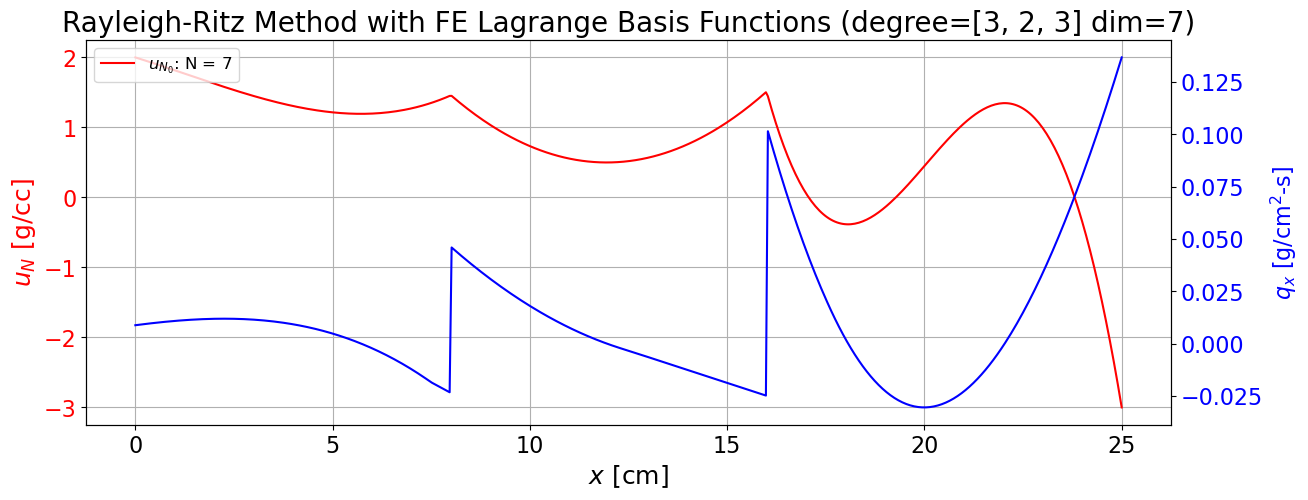

In [25]:
plot_solution([(femlb, c_star_vec)])

In [26]:
'''Rayleigh-Ritz solution evaluated at the boundaries'''

np.set_printoptions(precision=5)
print('u_N(a) = ', u_star(x_a, femlb, c_star_vec), ' u_N(b) = ', u_star(x_b, femlb, c_star_vec))

u_N(a) =  [2.]  u_N(b) =  [-3.]


### [Results: Mesh Convergence](#toc)<a id="results-mesh-convergence"></a>

In [27]:
'''Mesh convergence test'''
import math

def mesh_convergence(degree, femlb, c_star_vec, bc='homogeneous'):
    
    xpts = np.linspace(x_a, x_b, 30) # points for || ||_2 norm calculation

    femlb_0 = femlb
    c_star_vec_0 = np.copy(c_star_vec)
    u_0 = u_star(xpts, femlb_0, c_star_vec_0)

    cases = [(femlb_0, c_star_vec_0)] # mesh refinement cases
    degree = degree
    
    h_0 = x_b - x_a
    error_0 = 100
    
    step = 3
    for i in range(3,20,step):
        n_elem = [min(i,5),min(i,5),i]
        femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[x_a, 8, 16, x_b], 
                                 bc_x_min='dirichlet', bc_x_max='dirichlet')
        a_mtrx = assemble_a_matrix(femlb)
        b_vec = assemble_b_vector(femlb)
        c_star_vec = np.linalg.solve(a_mtrx, b_vec)
        u = u_star(xpts, femlb, c_star_vec)
        error = np.linalg.norm(u-u_0)
        relative_error = error/np.linalg.norm(u_0)*100
        h = list()
        for elem_patches in femlb.patches:
            for patch in elem_patches:
                h.append(patch[1]-patch[0])
        h = np.array(h).mean()
        p = (math.log(error) - math.log(error_0))/(math.log(h)-math.log(h_0))
        print('# elem = %s; relative ||u_%i - u_%i||_2 [%%] = %3.3e; h [cm] = %3.2f; p [] = %3.2f'%(n_elem,i,i-step,relative_error,h,p))
        cases.append((femlb, c_star_vec))
        c_star_vec_0 = np.copy(c_star_vec)
        femlb_0 = femlb
        u_0 = u_star(xpts, femlb_0, c_star_vec_0)
        if relative_error < 0.05:
            break
    print('done.')
    return cases

# elem = [3, 3, 3]; relative ||u_3 - u_0||_2 [%] = 3.581e+01; h [cm] = 2.78; p [] = 1.70
# elem = [5, 5, 6]; relative ||u_6 - u_3||_2 [%] = 5.258e+00; h [cm] = 1.56; p [] = 2.06
# elem = [5, 5, 9]; relative ||u_9 - u_6||_2 [%] = 1.010e+00; h [cm] = 1.32; p [] = 2.50
# elem = [5, 5, 12]; relative ||u_12 - u_9||_2 [%] = 3.760e-01; h [cm] = 1.14; p [] = 2.71
# elem = [5, 5, 15]; relative ||u_15 - u_12||_2 [%] = 2.681e-02; h [cm] = 1.00; p [] = 3.42
done.


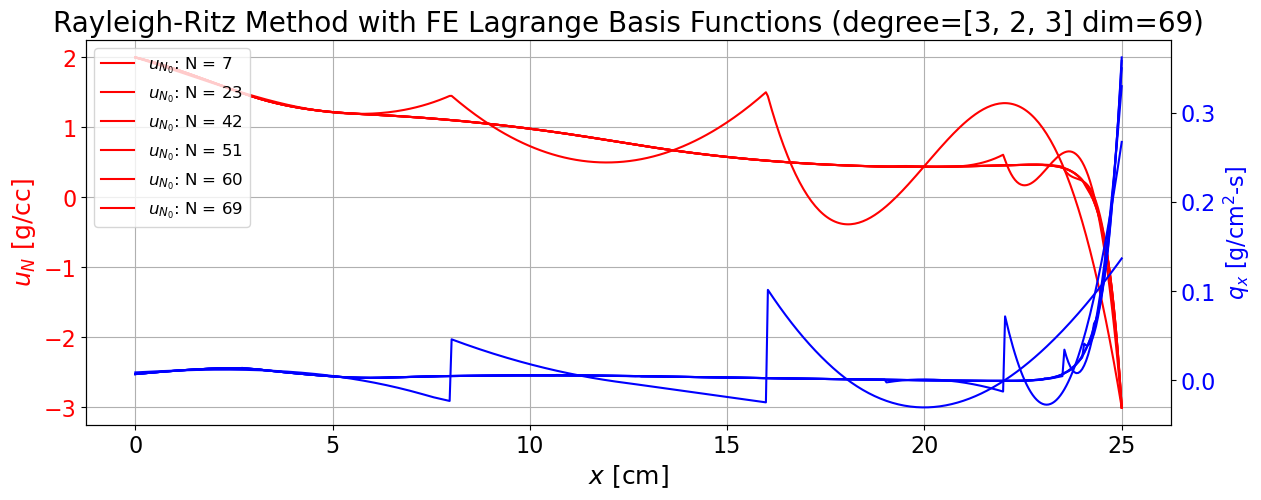

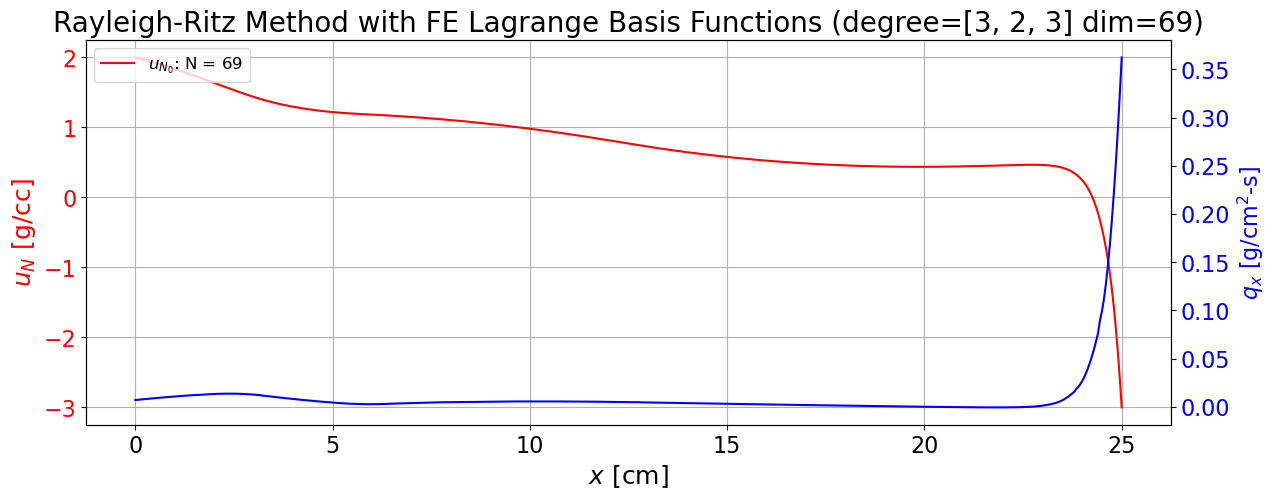

In [28]:
degree = [3,2,3]
cases = mesh_convergence(degree, femlb, c_star_vec, bc='inhomogeneous')
plot_solution(cases)
plot_solution([cases[-1]])

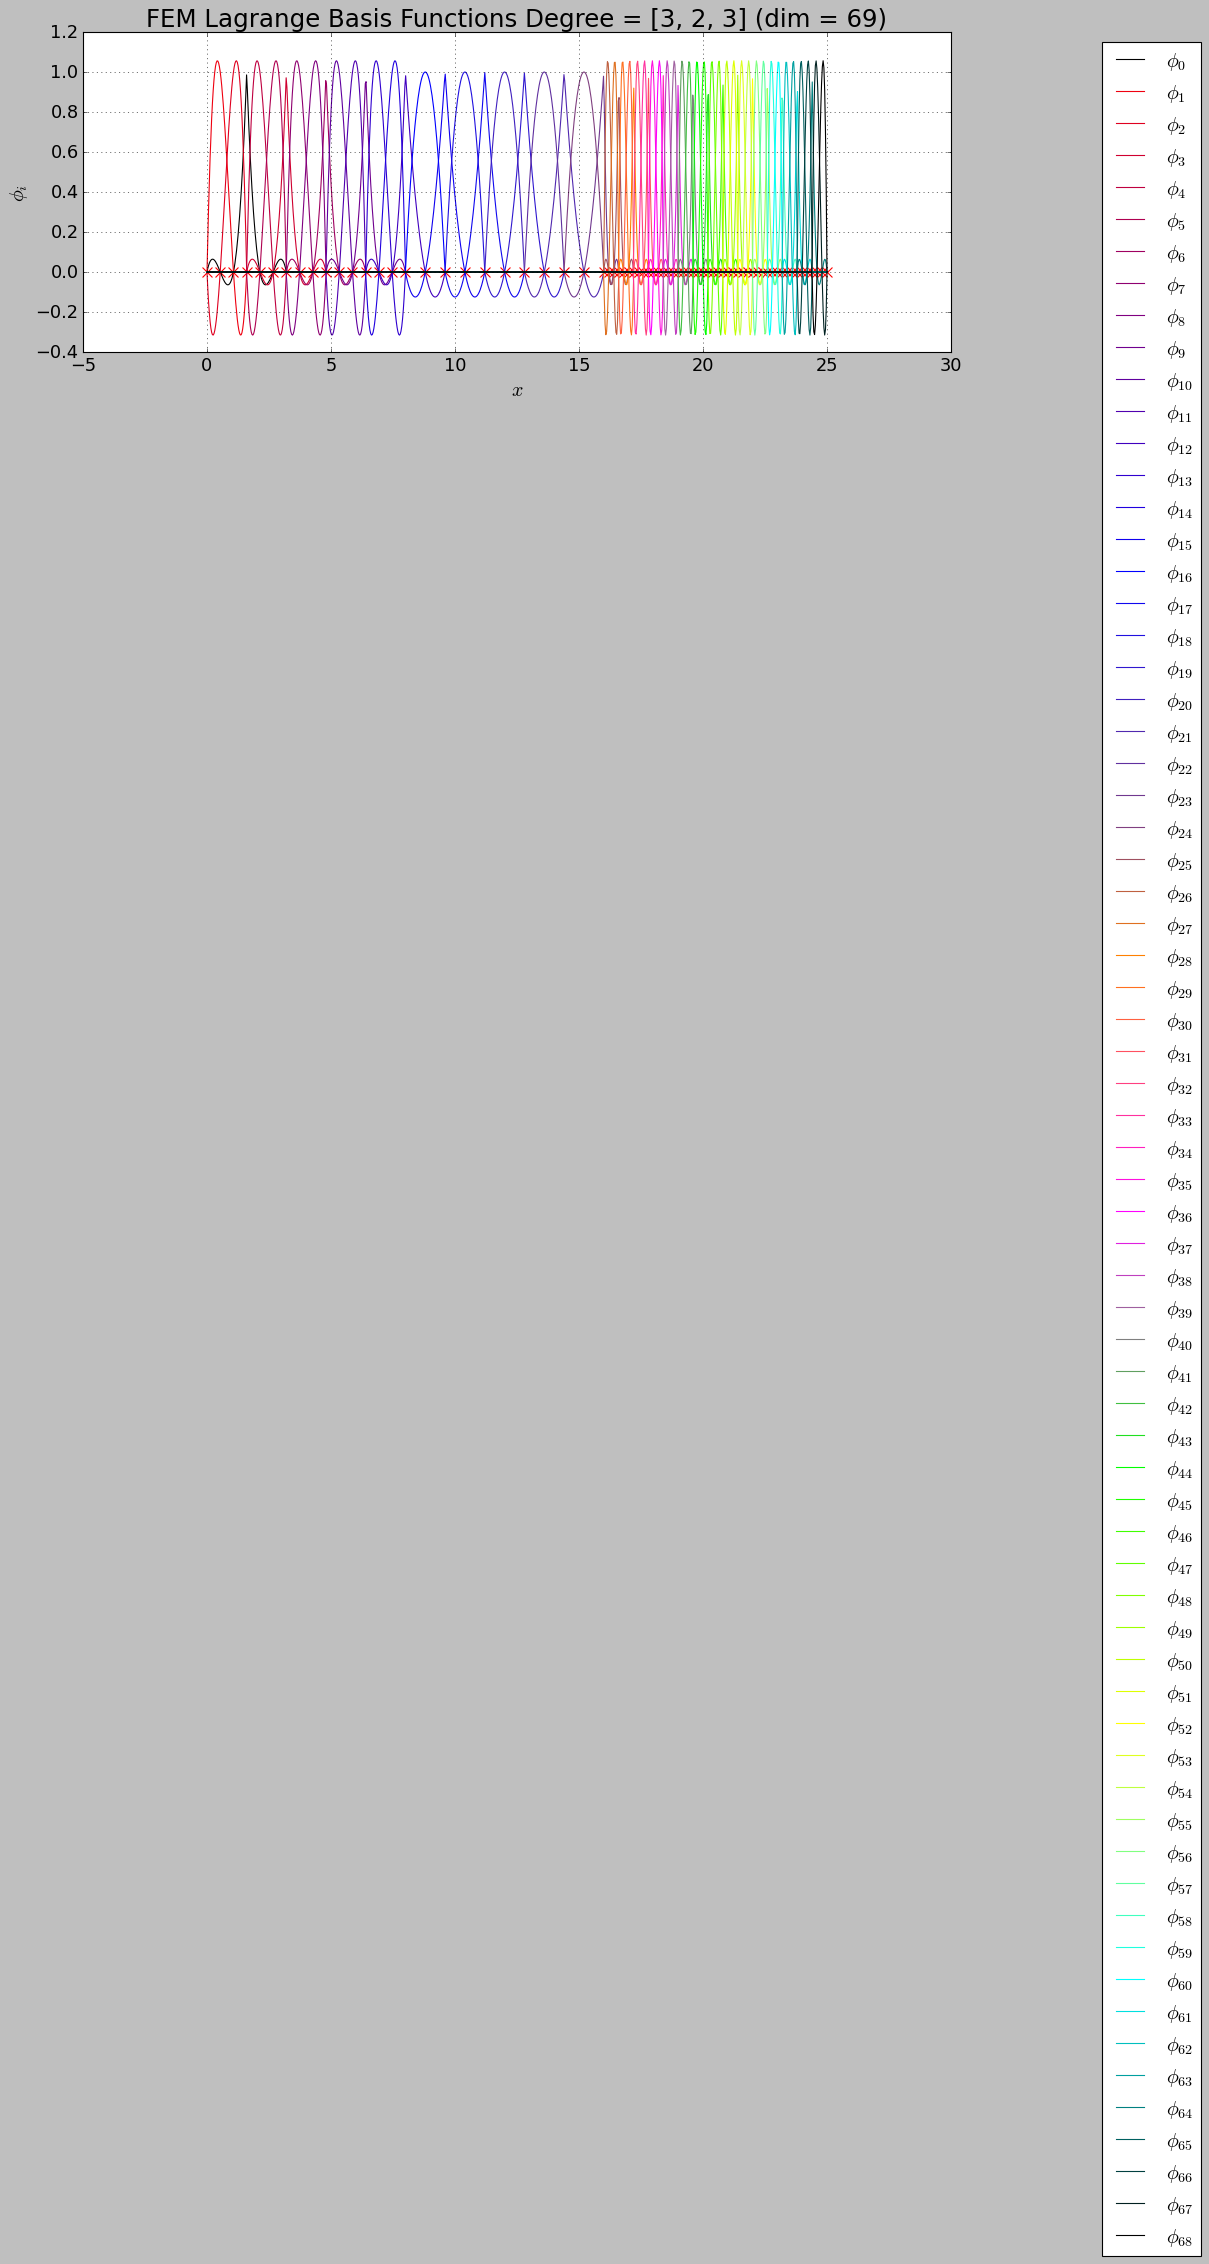

In [29]:
cases[-1][0].plot(n_plot_pts=800)

### [Results: Comparison with Cubic Hermite Basis](#toc)<a id="results-cubic-hermite"></a>

In [ ]:
'''Hermite finite element basis functions'''

try:    
    from engy_5310.toolkit import HermiteFEMBasis  
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'

degree = 3

femhb = HermiteFEMBasis(degree=degree, n_elem=[5,5], x_partition=[x_a, 12, x_b], bc_x_min='dirichlet', bc_x_max='dirichlet')

a_mtrx = get_a_matrix(femhb)

In [ ]:
try:    
    from engy_5310.toolkit import plot_matrix   
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
import matplotlib.pyplot as plt
plot_matrix(a_mtrx, plt.get_cmap('copper'))
np.set_printoptions(precision=2, threshold=50, edgeitems=7, linewidth=150)
print(a_mtrx)

In [ ]:
'''Hermite finite element basis functions'''

bc = 'inhomogeneous'

if bc == 'homogeneous':
    b_vec = get_b_vector_homogeneous_bc(femhb)
else:
    b_vec = get_b_vector_inhomogeneous_bc(femhb)
    
c_star_vec = np.linalg.solve(a_mtrx, b_vec)

plot_solution([(femhb, c_star_vec)])